# K-Means Clustering - Cardio Train
- 10122088 - Azhar Fachrezi
- 10122094 - Mochamad Nabil Ramdhani
- 10122095 - Muhamad Singgih Prasetyo
- 10122099 - Muhammad Raffy Abdillah

# Import Library

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import random

# Input Data

In [113]:
df = pd.read_excel("cardio_train.xlsx")

# Membuang fitur yang tidak diperlukan
df = df.drop(['id','CLASS cardio'], axis=1)

# Mengubah umur harian menjadi tahunan
df['age'] = df['age'] // 365

df

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,1,1,0,0,1
1,55,1,156,85.0,3,1,0,0,1
2,51,1,165,64.0,3,1,0,0,0
3,48,2,169,82.0,1,1,0,0,1
4,47,1,156,56.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,1,1,1,0,1
69996,61,1,158,126.0,2,2,0,0,1
69997,52,2,183,105.0,3,1,0,1,0
69998,61,1,163,72.0,1,2,0,0,0


# Pengecekan Data

In [114]:
missing_value = df.isnull()
for column in missing_value.columns.values.tolist():
    print(column)
    print(missing_value[column].value_counts())
    print('')

age
age
False    70000
Name: count, dtype: int64

gender
gender
False    70000
Name: count, dtype: int64

height
height
False    70000
Name: count, dtype: int64

weight
weight
False    70000
Name: count, dtype: int64

cholesterol
cholesterol
False    70000
Name: count, dtype: int64

gluc
gluc
False    70000
Name: count, dtype: int64

smoke
smoke
False    70000
Name: count, dtype: int64

alco
alco
False    70000
Name: count, dtype: int64

active
active
False    70000
Name: count, dtype: int64



In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   cholesterol  70000 non-null  int64  
 5   gluc         70000 non-null  int64  
 6   smoke        70000 non-null  int64  
 7   alco         70000 non-null  int64  
 8   active       70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


# K-Means Clustering

In [117]:
fitur = ['age','gender','height','weight','cholesterol','gluc','smoke','alco','active']

def inisialisasi_centroid(df, k, random_state=10):
    # Set seed untuk memastikan hasil acak yang konsisten
    random.seed(random_state)
    
    # Mengacak indeks dataframe
    indices = list(df.index)
    random.shuffle(indices)
    
    # Mengambil sample untuk centroid berdasarkan indeks yang telah diacak
    centroid_indices = indices[:k]
    centroid = df.loc[centroid_indices].values.tolist()
    
    # Mengubah centroid dari list ke dictionary
    centroid_dict = {i + 1: centroid[i] for i in range(len(centroid))}
    return centroid_dict

#### Melakukan Percobaan Menggunakan Centroid Acak

In [118]:
k = 2
centro = inisialisasi_centroid(df, k)
print(centro)

{1: [53.0, 1.0, 152.0, 62.0, 1.0, 1.0, 0.0, 0.0, 1.0], 2: [56.0, 1.0, 156.0, 60.0, 1.0, 1.0, 0.0, 0.0, 1.0]}


In [119]:
# Rumus Menghitung Jarak Setiap Data Ke Setiap Centroid
def jarak_euclid(df, fitur, centroid2):
    for i in centroid2.keys():
        squared_diff_sum = np.sum([(df[feature] - centroid2[i][j]) ** 2 for j, feature in enumerate(fitur)], axis=0)
        df[str(i)] = np.sqrt(squared_diff_sum)
    return df

In [120]:
df_euc = jarak_euclid(df, fitur,centro)
df_euc

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,1,2
0,50,2,168,62.0,1,1,0,0,1,16.309506,13.601471
1,55,1,156,85.0,3,1,0,0,1,23.515952,25.099801
2,51,1,165,64.0,3,1,0,0,0,13.490738,11.269428
3,48,2,169,82.0,1,1,0,0,1,26.739484,26.795522
4,47,1,156,56.0,1,1,0,0,0,9.433981,9.899495
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,1,1,1,0,1,21.330729,20.445048
69996,61,1,158,126.0,2,2,0,0,1,64.791975,66.234432
69997,52,2,183,105.0,3,1,0,1,0,53.084838,52.697249
69998,61,1,163,72.0,1,2,0,0,0,16.941074,14.832397


In [121]:
# Rumus Untuk Menentukan Cluster Setiap Data
def cluster_baru(df, centroid2):
    df['Cluster'] = df[[str(i) for i in centroid2.keys()]].idxmin(axis=1).astype('int')
    df = df[[col for col in df.columns if col != 'Cluster'] + ['Cluster']]
    return df

In [122]:
df_euc = cluster_baru(df_euc, centro)
df_euc

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,1,2,Cluster
0,50,2,168,62.0,1,1,0,0,1,16.309506,13.601471,2
1,55,1,156,85.0,3,1,0,0,1,23.515952,25.099801,1
2,51,1,165,64.0,3,1,0,0,0,13.490738,11.269428,2
3,48,2,169,82.0,1,1,0,0,1,26.739484,26.795522,1
4,47,1,156,56.0,1,1,0,0,0,9.433981,9.899495,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,1,1,1,0,1,21.330729,20.445048,2
69996,61,1,158,126.0,2,2,0,0,1,64.791975,66.234432,1
69997,52,2,183,105.0,3,1,0,1,0,53.084838,52.697249,2
69998,61,1,163,72.0,1,2,0,0,0,16.941074,14.832397,2


In [123]:
# Melakukan perhitungan rata-rata hasil iterasi untuk digunakan sebagai centroid baru
def centroid_baru(df, fitur, centroid2):
    for i in centroid2.keys():
        for j, feature in enumerate(fitur):
            centroid2[i][j] = np.mean(df[df['Cluster'] == i][feature])
    return centroid2

In [124]:
# Rumus untuk melakukan perulangan iterasi hingga tidak ada data yang berpindah cluster
def clusterisasi(df, fitur, k):
    centroid2 = inisialisasi_centroid(df, k)
    df_euc = copy.deepcopy(df)
    df_euc = jarak_euclid(df_euc, fitur, centroid2)
    df_euc = cluster_baru(df_euc, centroid2)
    centroid2 = centroid_baru(df_euc, fitur, centroid2)
    
    while True:
        centroid_lama = copy.deepcopy(centroid2)
        df_euc = jarak_euclid(df_euc, fitur, centroid2)
        df_euc = cluster_baru(df_euc, centroid2)
        centroid2 = centroid_baru(df_euc, fitur, centroid2)
        
        if (centroid_lama == centroid2):
            break
    
    return(df_euc, centroid2)

# Tes Clusterisasi K = 5

In [125]:
k = 5
df_euc, centroid2 = clusterisasi(df, fitur, k)

df_euc

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,1,2,3,4,5,Cluster
0,50,2,168,62.0,1,1,0,0,1,21.027549,11.367093,6.758781,44.079206,23.137062,3
1,55,1,156,85.0,3,1,0,0,1,5.965074,26.182685,20.562870,23.796483,17.094998,1
2,51,1,165,64.0,3,1,0,0,0,17.823609,9.429535,5.665613,42.084314,22.064457,3
3,48,2,169,82.0,1,1,0,0,1,13.338810,26.199304,13.958884,24.608845,6.198010,5
4,47,1,156,56.0,1,1,0,0,0,25.430556,6.768486,17.749540,51.549159,33.510313,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,1,1,1,0,1,11.077522,20.067331,7.554395,30.006093,9.821536,3
69996,61,1,158,126.0,2,2,0,0,1,46.540814,67.503748,59.043453,23.347567,44.910472,4
69997,52,2,183,105.0,3,1,0,1,0,35.518347,52.673240,39.595776,16.122197,22.984693,4
69998,61,1,163,72.0,1,2,0,0,0,10.590821,16.373341,11.248296,35.058874,18.214301,1


# Visualisasi Hasil K-Means

### Mencari Korelasi Antar Kolom "Age", " Height", "Weight"

<Axes: >

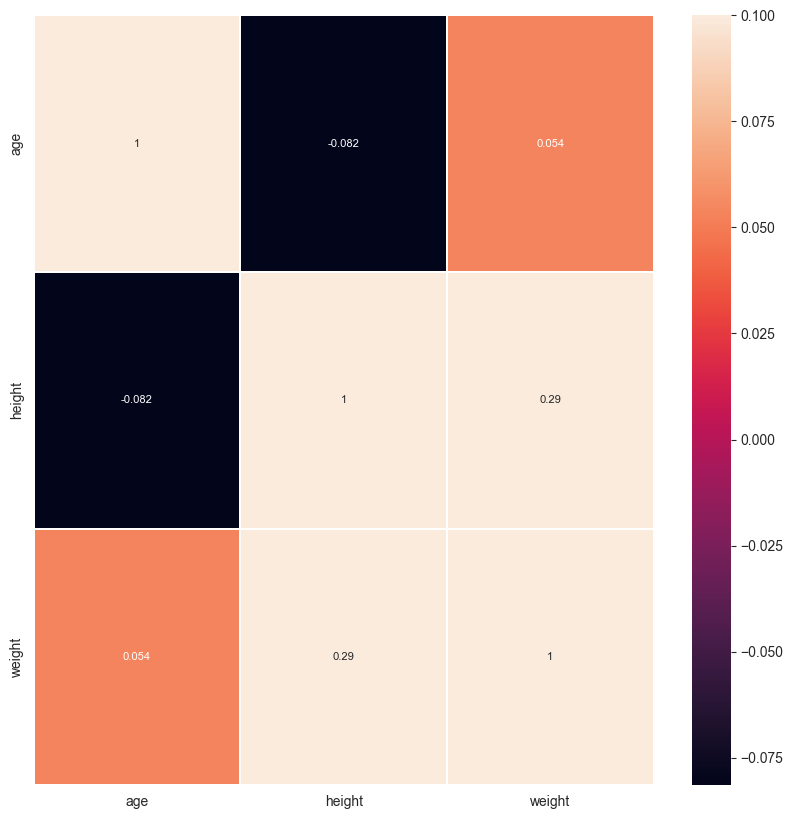

In [126]:
df_korelasi = df[['age','height','weight']].corr()
sns.set({'figure.figsize':(10,10)})
sns.heatmap(df_korelasi, linewidths=.05, vmax=0.1, annot=True, annot_kws={'fontsize':8})

Berdasarkan korelasi di atas, diperoleh korelasi terbaik antara height & weight 

### Membuat visualisasi Dari Korelasi

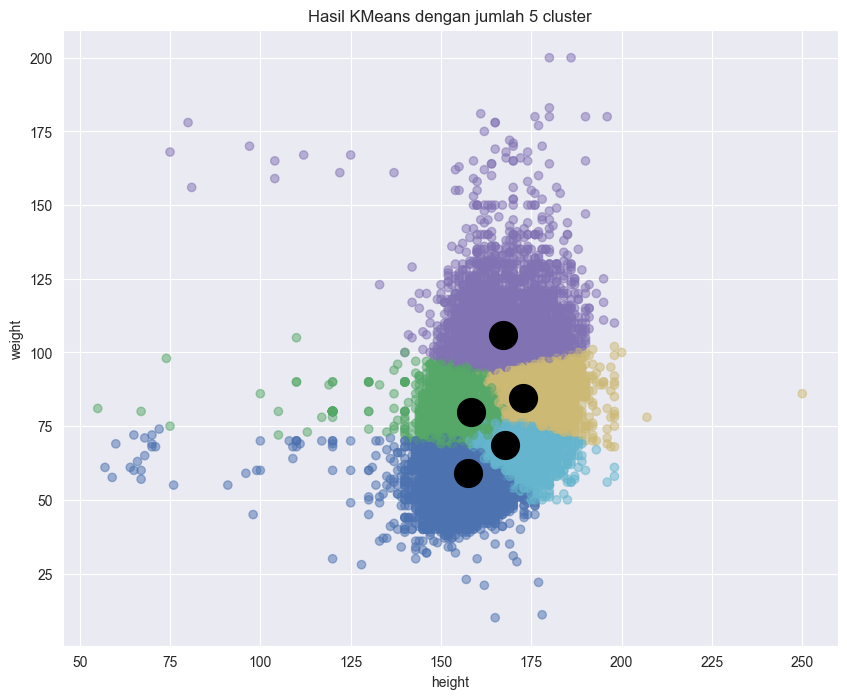

In [127]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
df_euc['color'] = df_euc['Cluster'].map(lambda x: colors[x % len(colors)])

# Pilih fitur untuk visualisasi
x = 'height'
y = 'weight'

# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
plt.scatter(df_euc[x], df_euc[y], c=df_euc['color'], alpha=0.5)

# Tambahkan centroid ke plot
for i in centroid2:
    plt.scatter(*[centroid2[i][fitur.index(x)], centroid2[i][fitur.index(y)]], color='black', s=400, marker='o')

plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Hasil KMeans dengan jumlah {k} cluster')
plt.show()